In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 4. Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. 
# Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [3]:
gdp_df = pd.read_csv(r'C:\Users\hayli\Documents\DA12\Projects\un-python-HaylieCannon\data\gdp_percapita.csv')

In [4]:
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


# 5. How many rows and columns are in `gdp_df`? What are the data types of each column?
# 5 columns and 7,662 rows. 1 object, 1 integer, 2 float

In [6]:
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


In [7]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


# 6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [9]:
gdp_df = gdp_df.drop(columns='Value Footnotes')

In [10]:
gdp_df

,Country or Area,Year,Value
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


In [11]:
gdp_df_rename = gdp_df.rename(columns={'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})

In [12]:
gdp_df_rename

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


# 7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. 
# What do you notice?

In [14]:
gdp_country_total_years = gdp_df_rename['Year'].nunique()
print(gdp_country_total_years)

33


In [15]:
gdp_country_count = gdp_df_rename.groupby(['Country']).count().sort_values(by = 'Year')
print(gdp_country_count)

                           Year  GDP_Per_Capita
Country                                        
Djibouti                     10              10
Somalia                      10              10
Turks and Caicos Islands     12              12
Sint Maarten (Dutch part)    14              14
Kosovo                       15              15
...                         ...             ...
Jamaica                      33              33
Japan                        33              33
Jordan                       33              33
IDA total                    33              33
Zimbabwe                     33              33

[242 rows x 2 columns]


In [16]:
gdp_country_counts = gdp_country_count.count()
print(gdp_country_counts)

Year              242
GDP_Per_Capita    242
dtype: int64


In [17]:
gdp_country_count

,Year,GDP_Per_Capita
Country,,
Djibouti,10,10
Somalia,10,10
Turks and Caicos Islands,12,12
Sint Maarten (Dutch part),14,14
Kosovo,15,15
...,...,...
Jamaica,33,33
Japan,33,33
Jordan,33,33


In [18]:
countries_with_all_years = gdp_country_count[gdp_country_count == gdp_country_total_years]
print(countries_with_all_years)

                           Year  GDP_Per_Capita
Country                                        
Djibouti                    NaN             NaN
Somalia                     NaN             NaN
Turks and Caicos Islands    NaN             NaN
Sint Maarten (Dutch part)   NaN             NaN
Kosovo                      NaN             NaN
...                         ...             ...
Jamaica                    33.0            33.0
Japan                      33.0            33.0
Jordan                     33.0            33.0
IDA total                  33.0            33.0
Zimbabwe                   33.0            33.0

[242 rows x 2 columns]


In [19]:
gdp_country_count[gdp_country_count['Year'] == 33]

,Year,GDP_Per_Capita
Country,,
Papua New Guinea,33,33
Pakistan,33,33
Australia,33,33
Pacific island small states,33,33
Austria,33,33
...,...,...
Jamaica,33,33
Japan,33,33
Jordan,33,33


In [20]:
countries_with_missing_years = gdp_country_count[gdp_country_count['Year'] < 33]
print(countries_with_missing_years)

                           Year  GDP_Per_Capita
Country                                        
Djibouti                     10              10
Somalia                      10              10
Turks and Caicos Islands     12              12
Sint Maarten (Dutch part)    14              14
Kosovo                       15              15
Cayman Islands               16              16
Nauru                        19              19
Afghanistan                  20              20
CuraÃ§ao                     22              22
Palau                        22              22
SÃ£o TomÃ© and Principe      22              22
Qatar                        23              23
Other small states           23              23
Timor-Leste                  23              23
Liberia                      23              23
Libya                        24              24
San Marino                   25              25
Small states                 26              26
Montenegro                   26         

In [21]:
# 8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery 
# (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, 
# a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type 
# that you can't necessarily get out of the others?

In [22]:
gdp_df_2020=gdp_df_rename[gdp_df_rename["Year"]==2020]

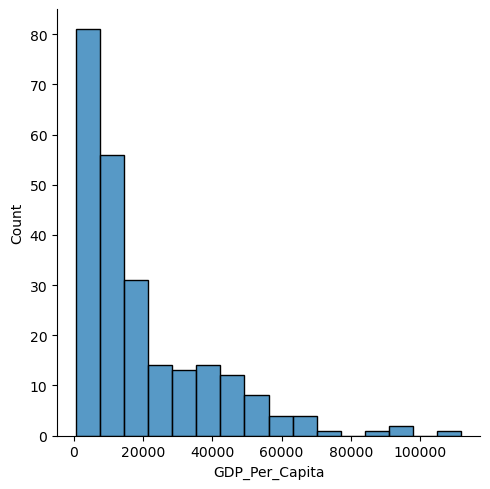

In [23]:
# Histogram
sns.displot(data=gdp_df_2020["GDP_Per_Capita"])

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

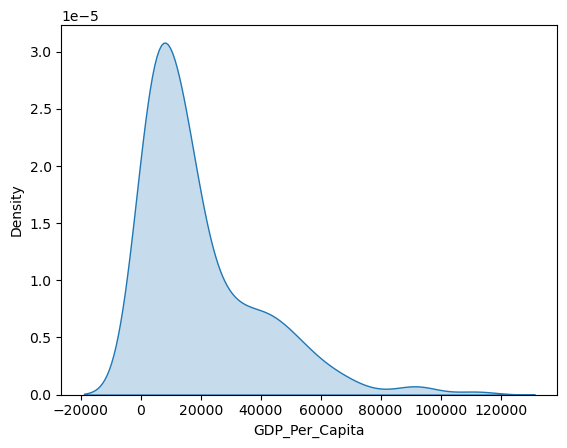

In [24]:
# Density Plot
sns.kdeplot(gdp_df_2020['GDP_Per_Capita'], fill=True)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

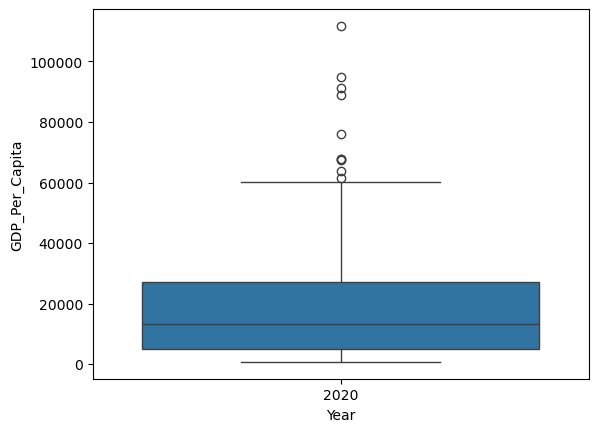

In [25]:
# Boxplot
sns.boxplot(x=gdp_df_2020["Year"], y=gdp_df_2020["GDP_Per_Capita"] )

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

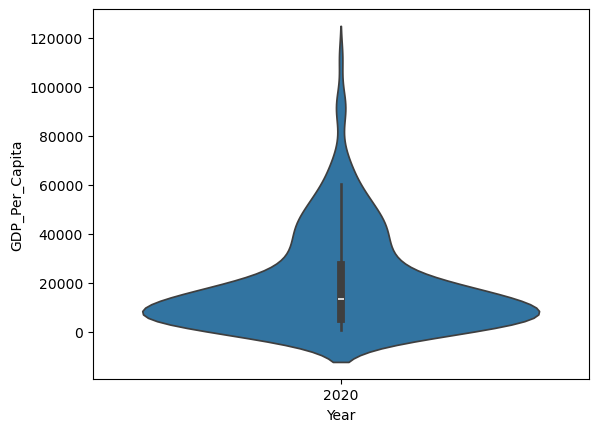

In [26]:
#violin plot
sns.violinplot(x=gdp_df_2020["Year"], y=gdp_df_2020["GDP_Per_Capita"])

In [27]:
#the all show very similar things

In [28]:
# 9. What was the median GDP per capita value in 2020?

In [29]:
gdp_df_2020median = gdp_df_2020["GDP_Per_Capita"].median()

In [30]:
gdp_df_2020median

13357.997573370474

In [31]:
# 10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. 
# Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
# 	* A boxplot
# 	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
# 	* A scatterplot
# 	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
# Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [32]:
gdp_df_4_years = gdp_df_rename[gdp_df_rename["Year"].isin([1990,2000,2010,2020])]

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

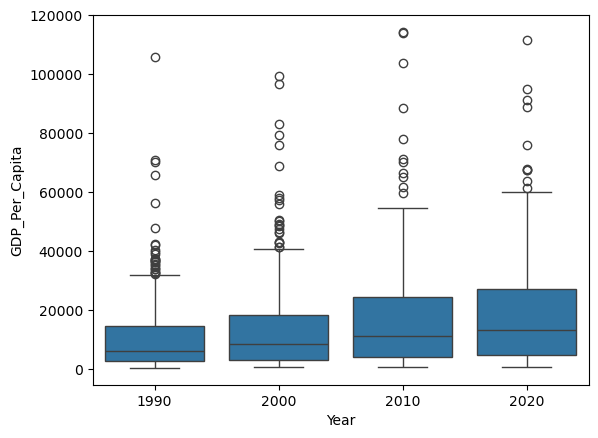

In [33]:
# box plot
sns.boxplot( x=gdp_df_4_years["Year"], y=gdp_df_4_years["GDP_Per_Capita"] )

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

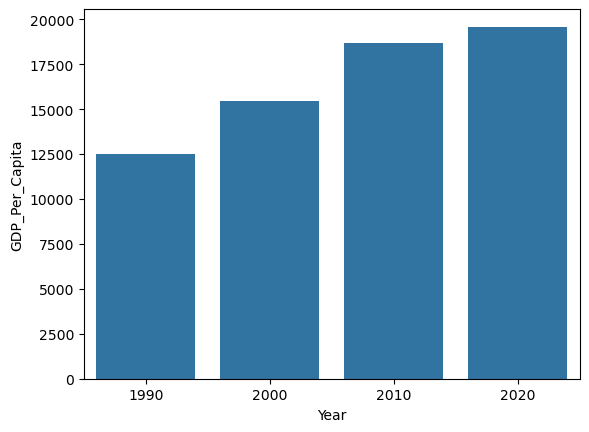

In [34]:
# bar plot
sns.barplot(x="Year", y="GDP_Per_Capita", data=gdp_df_4_years, errorbar=None)

Text(0, 0.5, 'GDP_Per_Capita')

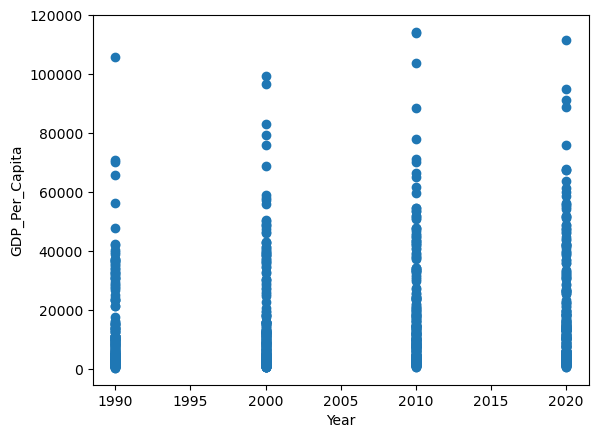

In [35]:
# Scatter plot
plt.scatter(gdp_df_4_years.Year, gdp_df_4_years.GDP_Per_Capita)
plt.xlabel("Year")
plt.ylabel("GDP_Per_Capita")

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

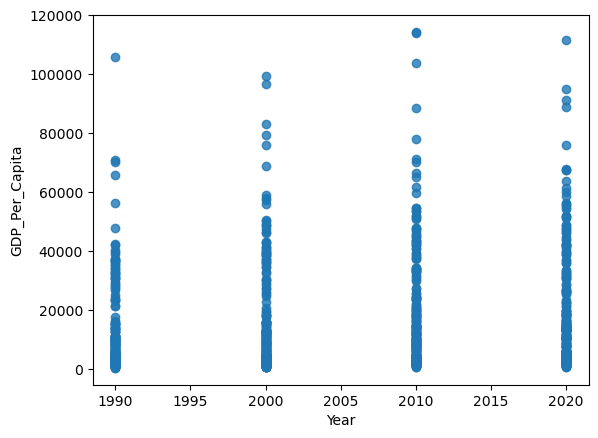

In [36]:
sns.regplot(x=gdp_df_4_years["Year"], y=gdp_df_4_years["GDP_Per_Capita"], fit_reg=False)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

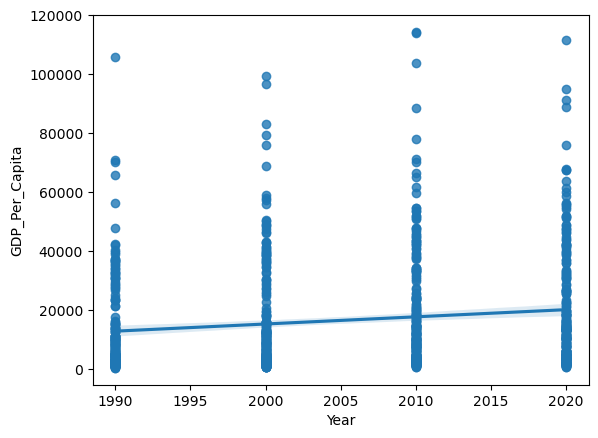

In [37]:
# scatter plot with trendline
sns.regplot(x=gdp_df_4_years["Year"], y=gdp_df_4_years["GDP_Per_Capita"])

In [38]:
# 11. Which country was the first to have a GDP per capita greater than $100,000?

In [39]:
gdp_df_100000 = gdp_df_rename[gdp_df_rename["GDP_Per_Capita"] > 100000]

In [40]:
sorted_gdp_df_100000 = gdp_df_100000.sort_values(["Year"]).reset_index()

In [41]:
sorted_gdp_df_100000.head()

,index,Country,Year,GDP_Per_Capita
0,7302,United Arab Emirates,1990,105893.626059
1,7301,United Arab Emirates,1991,101048.696239
2,7295,United Arab Emirates,1997,100956.706467
3,4167,Luxembourg,2001,101143.147977
4,4166,Luxembourg,2002,103317.331098


In [42]:
sorted_gdp_df_100000.loc[0]

index                             7302
Country           United Arab Emirates
Year                              1990
GDP_Per_Capita           105893.626059
Name: 0, dtype: object

In [43]:
# 12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan 
# of the dataset.

In [44]:
gdp_df_2020_max=gdp_df_2020['GDP_Per_Capita'].max()

In [45]:
gdp_df_2020_max

111751.3147513618

In [46]:
gdp_df_2020[gdp_df_2020['GDP_Per_Capita'] == gdp_df_2020_max]

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751


In [47]:
gdp_df_Luxembourg=gdp_df_rename[gdp_df_rename["Country"]=="Luxembourg"]

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

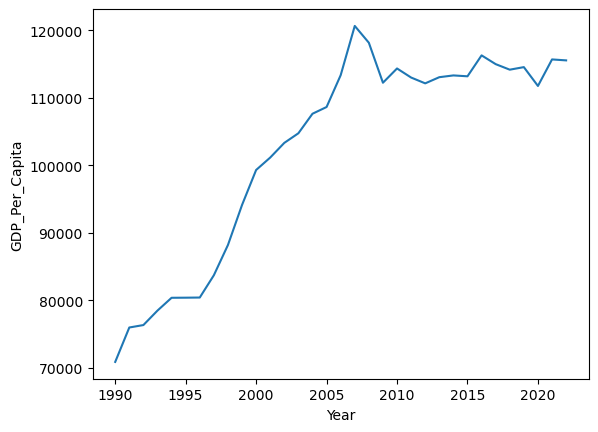

In [48]:
sns.lineplot(data=gdp_df_Luxembourg, x="Year", y="GDP_Per_Capita")

In [49]:
# 13. Which country had the lowest GDP per capita in 2020? 
# Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. 

In [50]:
gdp_df_2020_min=gdp_df_2020['GDP_Per_Capita'].min()
gdp_df_2020_min

711.355263423169

In [51]:
gdp_df_2020[gdp_df_2020['GDP_Per_Capita'] == gdp_df_2020_min]

,Country,Year,GDP_Per_Capita
973,Burundi,2020,711.355263


In [52]:
gdp_df_Burundi=gdp_df_rename[gdp_df_rename["Country"]=="Burundi"]

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

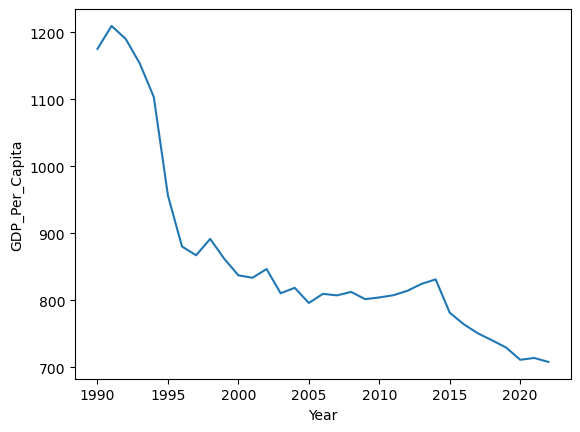

In [53]:
sns.lineplot(data=gdp_df_Burundi, x="Year", y="GDP_Per_Capita", )

In [54]:
# **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita 
# in 2020 than in 1990?

In [55]:
gdp_comparison = pd.merge(
    left = gdp_df_rename[gdp_df_rename['Year'] == 1990],
    right = gdp_df_rename[gdp_df_rename['Year'] == 2020],
    on = 'Country',
    suffixes = ['_1990', '_2020']
)

In [56]:
gdp_comparison['2020_lower'] = gdp_comparison['GDP_Per_Capita_2020'] < gdp_comparison['GDP_Per_Capita_1990']
gdp_comparison

,Country,Year_1990,GDP_Per_Capita_1990,Year_2020,GDP_Per_Capita_2020,2020_lower
0,Africa Eastern and Southern,1990,3037.297466,2020,3455.023119,False
1,Africa Western and Central,1990,2788.301039,2020,3957.933804,False
2,Albania,1990,4827.027705,2020,13278.369769,False
3,Algeria,1990,8828.874473,2020,10844.770764,False
4,Angola,1990,5793.084512,2020,6029.691895,False
...,...,...,...,...,...,...
202,Vanuatu,1990,2774.138350,2020,2848.970240,False
203,Viet Nam,1990,2099.394649,2020,10450.622382,False
204,World,1990,9705.981267,2020,16204.169107,False
205,Zambia,1990,2290.039226,2020,3183.650773,False


In [57]:
gdp_comparison['2020_lower'].value_counts()

2020_lower
False    188
True      19
Name: count, dtype: int64

In [58]:
# 14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the 
# read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) 
# Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. 
# Also, check the datatypes of the columns.

In [59]:
internet_df = pd.read_csv(r'C:\Users\hayli\Documents\DA12\Projects\un-python-HaylieCannon\data\internet_use.csv', nrows=6083)

In [60]:
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.600000,1
1,Afghanistan,2018,16.800000,2
2,Afghanistan,2017,13.500000,3
3,Afghanistan,2016,11.000000,4
4,Afghanistan,2015,8.260000,4
...,...,...,...,...
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN


In [61]:
# 15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [62]:
internet_df_drop = internet_df.drop(columns='Value Footnotes')

In [63]:
internet_df_drop

,Country or Area,Year,Value
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


In [64]:
internet_df_rename = internet_df_drop.rename(columns={'Country or Area': 'Country', 'Value': 'Internet_Users_Pct'})

In [65]:
internet_df_rename

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


In [66]:
# 16. Look at the number of observations in this dataset per year. What do you notice?

In [67]:
internet_df_count = internet_df_rename.groupby("Year")
print(internet_df_count)

In [68]:
internet_df_count_sorted = internet_df_count.sort_values(ascending=False)

AttributeError: 'DataFrameGroupBy' object has no attribute 'sort_values'

In [ ]:
# Answer: The number of dataset per year

In [ ]:
# 17. What is the first year to have a non-zero internet users percentage value?

In [69]:
internet_df_rename[internet_df_rename['Internet_Users_Pct'] > 0].sort_values('Year')

,Country,Year,Internet_Users_Pct
1570,Denmark,1990,0.097277
2892,Japan,1990,0.020294
306,Australia,1990,0.585095
2034,France,1990,0.052778
339,Austria,1990,0.130369
...,...,...,...
427,Bangladesh,2023,44.502700
677,Bosnia and Herzegovina,2023,83.377200
1656,Ecuador,2023,72.694300
1537,Denmark,2023,98.775600


In [77]:
internet_df_rename_nonzero = internet_df_rename[internet_df_rename["Internet_Users_Pct"] > 0].sort_values('Year')
print(internet_df_rename_nonzero)

                     Country  Year  Internet_Users_Pct
1570                 Denmark  1990            0.097277
2892                   Japan  1990            0.020294
306                Australia  1990            0.585095
2034                  France  1990            0.052778
339                  Austria  1990            0.130369
...                      ...   ...                 ...
427               Bangladesh  2023           44.502700
677   Bosnia and Herzegovina  2023           83.377200
1656                 Ecuador  2023           72.694300
1537                 Denmark  2023           98.775600
3057                  Kuwait  2023           99.747300

[5803 rows x 3 columns]


In [73]:
internet_df_rename_nonzero_min = internet_df_rename_nonzero["Year"].min()
print(internet_df_rename_nonzero_min)

1990


In [ ]:
# Answer: The first year with a non zero internet users percentage value is 1990.

In [ ]:
# 18. How does the distribution of internet users percent differ for 2000 and 2014?

In [79]:
internet_df_2000 = internet_df_rename[internet_df_rename["Year"]== 2000]

In [81]:
internet_df_2014 = internet_df_rename[internet_df_rename["Year"]== 2014]

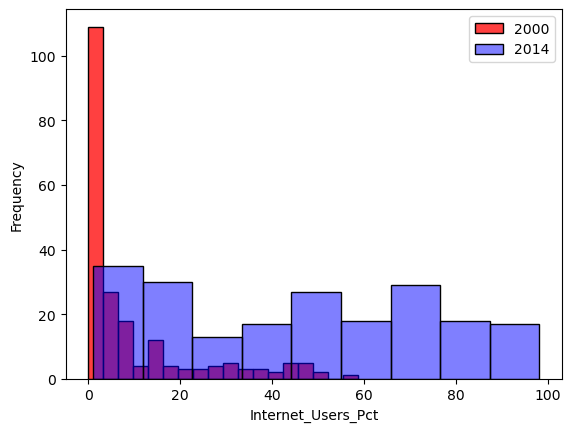

In [99]:
sns.histplot(data=internet_df_2000, x="Internet_Users_Pct", label = 2000, color = 'red')
sns.histplot(data=internet_df_2014, x="Internet_Users_Pct", alpha = .5, label = 2014, color = 'blue')
plt.ylabel("Frequency")
plt.legend()

In [ ]:
# Answer: 2020 has a lot more countries with lower users user percentages. 2014 has a pretty even distribution

In [ ]:
# 19. For how many countries was the percentage of internet users below 5% in 2014?

In [101]:
internet_df_2014_below_5pct = internet_df_2014[internet_df_2014["Internet_Users_Pct"]<5].count()
print(internet_df_2014_below_5pct)

Country               10
Year                  10
Internet_Users_Pct    10
dtype: int64


In [107]:
internet_df_rename.loc[(internet_df_rename['Year'] == 2014) & (internet_df_rename["Internet_Users_Pct"]<5)]

,Country,Year,Internet_Users_Pct
873,Burundi,2014,1.04239
1033,Central African Republic,2014,2.70000
1061,Chad,2014,2.90000
1517,Democratic Republic of the Congo,2014,3.00000
1782,Eritrea,2014,0.99000
2451,Guinea-Bissau,2014,3.32000
3364,Madagascar,2014,3.70000
4073,Niger,2014,1.24868
5055,Somalia,2014,1.63000
5116,South Sudan,2014,2.60000


In [ ]:
# Answer: there are 10 countries with a percentage of internet users below 5% in 2014

In [ ]:
# 20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. 
# Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [113]:
gdp_and_internet_use = gdp_df_rename.merge(internet_df_rename, on=["Country","Year"], how='outer')
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,1990,NaN,0.000000
1,Afghanistan,2001,NaN,0.004723
2,Afghanistan,2002,1280.463171,0.004561
3,Afghanistan,2003,1292.333437,0.087891
4,Afghanistan,2004,1260.060581,0.105809
...,...,...,...,...
9107,Zimbabwe,2018,2399.621551,25.000000
9108,Zimbabwe,2019,2203.396810,26.588300
9109,Zimbabwe,2020,1990.319419,29.298600
9110,Zimbabwe,2021,2115.144555,32.461600


In [115]:
# 21. Find the three countries with the highest internet users percentage in 2014. 
# Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for 
# these three countries. What do you notice?

In [125]:
gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014].nlargest(3, 'Internet_Users_Pct')

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3820,Iceland,2014,50450.741612,98.158
2780,Falkland (Malvinas) Islands,2014,NaN,97.600
794,Bermuda,2014,77361.104881,96.800


In [131]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use["Year"] == 2014].sort_values(by= "Internet_Users_Pct", ascending=False)

In [133]:
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3820,Iceland,2014,50450.741612,98.1580
2780,Falkland (Malvinas) Islands,2014,NaN,97.6000
794,Bermuda,2014,77361.104881,96.8000
6243,Norway,2014,62838.515727,96.3005
2100,Denmark,2014,52048.335493,95.9935
...,...,...,...,...
8450,Turks and Caicos Islands,2014,24661.145053,NaN
8516,TÃ¼rkiye,2014,24600.518215,NaN
8746,Upper middle income,2014,14063.487284,NaN
8978,West Bank and Gaza,2014,5967.073437,NaN


In [ ]:
# Top 3 countries in 2014 are Luxembourg, Qatar and Singapore

In [129]:
gdp_and_internet_use_top3 = gdp_and_internet_use[gdp_and_internet_use["Country"].isin(["Iceland", "Falkland (Malvinas) Islands", "Bermuda"])]

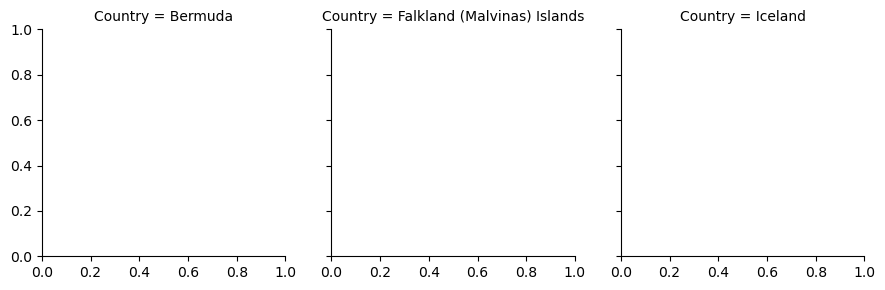

In [135]:
g = sns.FacetGrid(gdp_and_internet_use_top3, col="Country")

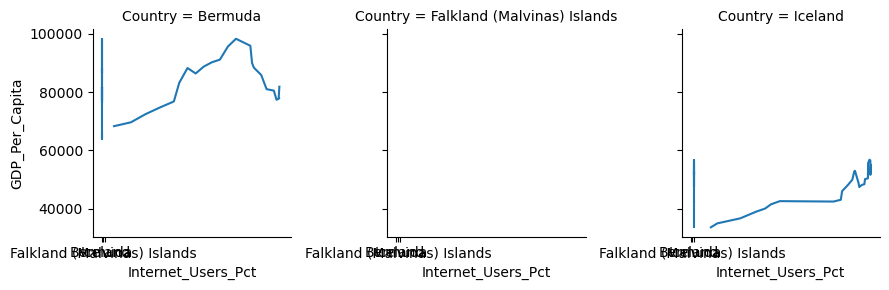

In [185]:
g.map(plt.plot, "Internet_Users_Pct", "GDP_Per_Capita")
plt.show()

In [ ]:
# 22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`

In [ ]:
gdp_and_internet_use_2014=gdp_and_internet_use[gdp_and_internet_use["Year"]==2014]

In [ ]:
# 23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? 
# If you see any unusual points, investigate them.

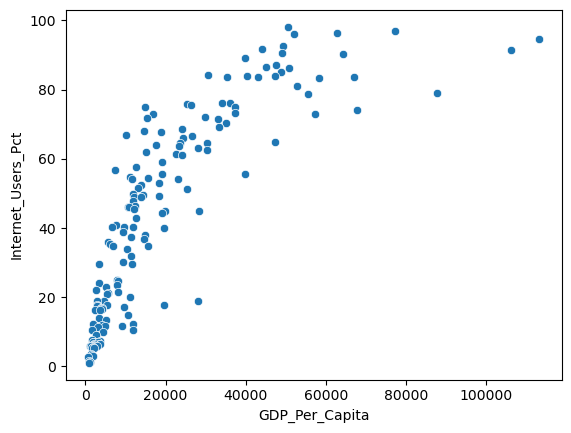

In [145]:
sns.scatterplot(x="GDP_Per_Capita", y="Internet_Users_Pct", data=gdp_and_internet_use_2014)
plt.show()

In [151]:
gdp_and_internet_use.loc[(gdp_and_internet_use['Year'] == 2014) & (gdp_and_internet_use['GDP_Per_Capita'] > 2500) & (gdp_and_internet_use['Internet_Users_Pct'] <20)]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
595,Bangladesh,2014,4119.424639,11.9000
761,Benin,2014,2883.899098,6.0000
1219,Cambodia,2014,3378.364591,14.0000
1252,Cameroon,2014,3530.283191,16.2149
1633,Comoros,2014,3183.157031,6.9800
2130,Djibouti,2014,3854.269956,17.0000
2461,Equatorial Guinea,2014,28106.198389,18.8600
3130,Ghana,2014,4628.901413,19.0000
3457,Haiti,2014,3154.683998,11.4000
3853,India,2014,5071.047084,13.5000


In [ ]:
# 24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries 
# in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". 
# Put these labels in a new column, named "GDP_group".

In [153]:
gdp_and_internet_use_2014_qcut = pd.qcut(gdp_and_internet_use_2014["GDP_Per_Capita"], 3, labels=["Low", "Medium", "High"], retbins=False, precision=3, duplicates='raise')
print(gdp_and_internet_use_2014_qcut)

gdp_and_internet_use_2014['GDP_group'] = pd.qcut(gdp_and_internet_use_2014["GDP_Per_Capita"], q=3, labels=["Low", "Medium", "High"]

3820      High
2780       NaN
794       High
6243      High
2100      High
         ...  
8450      High
8516      High
8746    Medium
8978       Low
9011    Medium
Name: GDP_Per_Capita, Length: 284, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']


In [163]:
gdp_and_internet_use_2014['GDP_group'] = pd.qcut(gdp_and_internet_use_2014["GDP_Per_Capita"], q=3, labels=["Low", "Medium", "High"])

In [ ]:
# 25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

In [165]:
gdp_and_internet_use_2014.groupby('GDP_group')['Internet_Users_Pct'].median()

C:\Users\hayli\AppData\Local\Temp\ipykernel_17960\1179629846.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gdp_and_internet_use_2014.groupby('GDP_group')['Internet_Users_Pct'].median()


GDP_group
Low       11.0000
Medium    45.8752
High      75.9800
Name: Internet_Users_Pct, dtype: float64

In [ ]:
### Bonus exercise:
# 1.    Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.